<a href="https://colab.research.google.com/github/Javier-Alfonso-DS/HCK1_VILADEHACK_2022/blob/main/vila_data_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackathon ViladeHack 2022

![](2022-03-26-09-50-38.png)
![](2022-03-26-09-50-09.png)

- Viladecans daily consumption 

	- DATA - Consumption registration date
	- TIPUS_CLIENT - Type of customer (commercial or industrial, in both cases it is non-domestic customers)
	- CONSUM_DIA - Accumulated consumption during the day in m3
	- NUM_CLIENT_ANONIMITZAT - Anonymised customer number
----  
- Monthly consumption Viladecans

	- DATA - Invoice date of consumption
	- NUM_IAE - IAE epigraph of economic activity of the business
	- TEXT_IAE - Descriptive text of the IAE epigraph
	- CONSUM_MES - Accumulated consumption during the two-month billing period (in m3)
	- NUM_CLIENT_ANONIMITZAT - Anonymised customer number

The monthly consumption dataset provides information on the type of economic activity of the customers.  
**The consumption information is not relevant in this dataset.**

## Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
# Import personal library
#import Pers_lib as Pers

In [ ]:
# settings to display all columns (default is 20, now is None (all))
pd.set_option("display.max_columns", None)

In [ ]:
df_month = pd.read_csv('https://raw.githubusercontent.com/viladehack/Viladehack_DataScience/main/Consum_mensual_viladecans_2018_2022_clean.csv',
                       parse_dates=["DATA"], 
                       infer_datetime_format=True)
df_month.head()

,DATA,NUM_IAE,TEXT_IAE,CONSUM_MES,NUM_CLIENT_ANONIMITZAT
0,2018-04-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,14,ODS25IEHI
1,2019-10-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,29,ODS25IEHI
2,2019-12-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,26,ODS25IEHI
3,2021-02-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,0,ODS25IEHI
4,2021-10-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,5,ODS25IEHI


In [ ]:
df_day   = pd.read_csv('https://raw.githubusercontent.com/viladehack/Viladehack_DataScience/main/Consum_diari_viladecans_2018_2021.csv',
                       parse_dates=["DATA"], 
                       infer_datetime_format=True)
df_day.head()

,DATA,TIPUS_CLIENT,CONSUM,NUM_CLIENT_ANONIMITZAT
0,2018-01-24,COMERCIAL,0,ODS25IEHI
1,2018-01-03,COMERCIAL,0,ODS25IEHI
2,2018-01-28,COMERCIAL,20,ODS25IEHI
3,2018-01-19,COMERCIAL,31,ODS25IEHI
4,2018-01-18,COMERCIAL,31,ODS25IEHI


In [ ]:
month =  df_month[["NUM_CLIENT_ANONIMITZAT", "NUM_IAE", "TEXT_IAE" ]]
month.head()

,NUM_CLIENT_ANONIMITZAT,NUM_IAE,TEXT_IAE
0,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
1,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
2,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
3,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
4,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT


In [ ]:
month = month.drop_duplicates()

In [ ]:
df = pd.merge(df_day, month, on=['NUM_CLIENT_ANONIMITZAT'])
df

,DATA,TIPUS_CLIENT,CONSUM,NUM_CLIENT_ANONIMITZAT,NUM_IAE,TEXT_IAE
0,2018-01-24,COMERCIAL,0,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
1,2018-01-03,COMERCIAL,0,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
2,2018-01-28,COMERCIAL,20,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
3,2018-01-19,COMERCIAL,31,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
4,2018-01-18,COMERCIAL,31,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
...,...,...,...,...,...,...
928262,2021-12-12,COMERCIAL,3,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
928263,2021-12-15,COMERCIAL,-1,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
928264,2021-12-23,COMERCIAL,50,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
928265,2021-12-27,COMERCIAL,101,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA


In [ ]:
df.nunique()

DATA                       1460
TIPUS_CLIENT                  2
CONSUM                    13393
NUM_CLIENT_ANONIMITZAT     1686
NUM_IAE                     324
TEXT_IAE                    322
dtype: int64

In [ ]:
df.TIPUS_CLIENT.unique()

array(['COMERCIAL', 'INDUSTRIAL'], dtype=object)

In [ ]:
INDUSTRIAL_df = df[df["TIPUS_CLIENT"]=="INDUSTRIAL"]
INDUSTRIAL_df.head()

,DATA,TIPUS_CLIENT,CONSUM,NUM_CLIENT_ANONIMITZAT,NUM_IAE,TEXT_IAE
9965,2018-02-25,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda
9966,2018-02-11,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda
9967,2018-02-08,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda
9968,2018-02-01,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda
9969,2018-02-18,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda


In [ ]:
INDUSTRIAL_df.nunique()

DATA                       1460
TIPUS_CLIENT                  1
CONSUM                    12381
NUM_CLIENT_ANONIMITZAT      131
NUM_IAE                      87
TEXT_IAE                     87
dtype: int64

In [ ]:
df[df["NUM_IAE"]=="I9997"].nunique()

DATA                      1460
TIPUS_CLIENT                 2
CONSUM                    3132
NUM_CLIENT_ANONIMITZAT     301
NUM_IAE                      1
TEXT_IAE                     1
dtype: int64

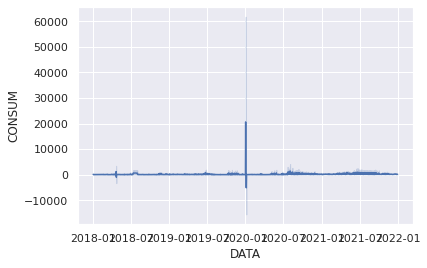

In [ ]:
sns.lineplot(x="DATA", y="CONSUM",
             data=df[df["NUM_IAE"]=="I9997"])

In [ ]:
COMERCIAL_df = df[df["TIPUS_CLIENT"]=="COMERCIAL"]

,DATA,TIPUS_CLIENT,CONSUM,NUM_CLIENT_ANONIMITZAT,NUM_IAE,TEXT_IAE
0,2018-01-24,COMERCIAL,0,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
1,2018-01-03,COMERCIAL,0,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
2,2018-01-28,COMERCIAL,20,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
3,2018-01-19,COMERCIAL,31,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
4,2018-01-18,COMERCIAL,31,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
...,...,...,...,...,...,...
928262,2021-12-12,COMERCIAL,3,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
928263,2021-12-15,COMERCIAL,-1,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
928264,2021-12-23,COMERCIAL,50,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
928265,2021-12-27,COMERCIAL,101,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
